# Density and Filtered (by dropdown) Maps: Environmental Burden (CES) and Power Plants

### Author: Rachel Lu

### Description
This notebook focuses on the maps and visualizations that:

1) Describe the spatialization of power plants across California. I map power plants across CA by type and create hexbins to map powerplant density per census tract. 

2) Describe the spatialization of power plants across California and their relationship to the environmental burden per census tract. To do so, I create a map of power plants overlaid on CES percentiles which allows filtering by fossil fuel and clean energy as well as community type each plant is located within (disadvantaged communities and low income communities). 


# Import Libraries

In [1]:
%matplotlib notebook
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
import plotly.express as px


/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


# Import Data

Import California Power Plant dataset. 

In [2]:
cpp = gpd.read_file('California_Power_Plants_MP Cleaned 3.1.21.csv')

# Data Exploration

Let's explore our data. 

In [3]:
type(cpp)

geopandas.geodataframe.GeoDataFrame

In [4]:
cpp.shape

(871, 25)

Excellent, we have 871 power plants in our data set! 

Next, let's take a look at the data in our data set. 

In [5]:
cpp.head(5)

,Plant_ID,Plant_Label,MW,Gross_MWh,Net_MWh,General_Fuel,Status,Online_Year,REAT_ID,County,...,Congressional_District,CES30_PercentileRange,CES30_Percentile,Longitude,Latitude,Operation_Job,Capacity_Factor,Income_Percent,Project_Location,geometry
0,E0006,Burney Mtn. Power,11,,,Biomass,Operating,1985,C-3,Shasta,...,Congressional District 1,50-55%,51,-121.6395876,40.91000072,,,61,Neither Low Income Nor Disadvantaged Community,None
1,E0056,Mt. Lassen Power,11.4,,,Biomass,Operating,1985,C-4,Lassen,...,Congressional District 1,30-35%,30,-121.0178306,40.29741968,,,66,Neither Low Income Nor Disadvantaged Community,None
2,E0113,Commerce,11.5,,,Biomass,Operating,1986,F-11,Los Angeles,...,Congressional District 40,95-100% (highest scores),97,-118.1537915,33.99486138,,,75,Disadvantaged Community,None
3,E0026,Collins Pine,12,15398.03,8763,Biomass,Operating,1985,C-4,Plumas,...,Congressional District 1,20-25%,24,-121.2439679,40.30207759,,0.08313411,70,Neither Low Income Nor Disadvantaged Community,None
4,E0018,Chowchilla II,12.5,79062.01,67181,Biomass,Standby,2008,D-8,Madera,...,Congressional District 16,70-75%,72,-120.2488396,37.10692537,,0.61184882,48,Low Income,None


Looks like a few columns don't have much information in them. We'll delete them later. We also notice that there is no geometry data, so we'll have to change that when we clean the data below. 

In [6]:
cpp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 871 entries, 0 to 870
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Plant_ID                871 non-null    object  
 1   Plant_Label             871 non-null    object  
 2   MW                      871 non-null    object  
 3   Gross_MWh               871 non-null    object  
 4   Net_MWh                 871 non-null    object  
 5   General_Fuel            871 non-null    object  
 6   Status                  871 non-null    object  
 7   Online_Year             871 non-null    object  
 8   REAT_ID                 871 non-null    object  
 9   County                  871 non-null    object  
 10  State_                  871 non-null    object  
 11  Renewable_Energy        871 non-null    object  
 12  Jobs                    871 non-null    object  
 13  Senate_District         871 non-null    object  
 14  Assembly_District 

We notice that all the data types are objects. We'll have to convert some data types to floats or ints in order to work with them for our visualizations. 

# Clean Data

Let's rename some of our columns so they're easier to work with and more intuitive. 

First, we print a list of all the columns in the CPP dataset. 

In [7]:
list(cpp)

['Plant_ID',
 'Plant_Label',
 'MW',
 'Gross_MWh',
 'Net_MWh',
 'General_Fuel',
 'Status',
 'Online_Year',
 'REAT_ID',
 'County',
 'State_',
 'Renewable_Energy',
 'Jobs',
 'Senate_District',
 'Assembly_District',
 'Congressional_District',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Longitude',
 'Latitude',
 'Operation_Job',
 'Capacity_Factor',
 'Income_Percent',
 'Project_Location',
 'geometry']

Next, we rename the columns we'd like renamed

In [8]:
#rename
cpp.columns = ['Plant_ID',
 'Name',
 'MW',
 'Gross_MWh',
 'Net_MWh',
 'Fuel_Type',
 'Status',
 'Online_Year',
 'REAT_ID',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'Senate_District',
 'Assembly_District',
 'Congressional_District',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Operation_Job',
 'Capacity_Factor',
 'Income_Percent',
 'Project_Location',
 'geometry']

#print to double check it worked. 
cpp.head(5)

,Plant_ID,Name,MW,Gross_MWh,Net_MWh,Fuel_Type,Status,Online_Year,REAT_ID,County,...,Congressional_District,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Operation_Job,Capacity_Factor,Income_Percent,Project_Location,geometry
0,E0006,Burney Mtn. Power,11,,,Biomass,Operating,1985,C-3,Shasta,...,Congressional District 1,50-55%,51,-121.6395876,40.91000072,,,61,Neither Low Income Nor Disadvantaged Community,None
1,E0056,Mt. Lassen Power,11.4,,,Biomass,Operating,1985,C-4,Lassen,...,Congressional District 1,30-35%,30,-121.0178306,40.29741968,,,66,Neither Low Income Nor Disadvantaged Community,None
2,E0113,Commerce,11.5,,,Biomass,Operating,1986,F-11,Los Angeles,...,Congressional District 40,95-100% (highest scores),97,-118.1537915,33.99486138,,,75,Disadvantaged Community,None
3,E0026,Collins Pine,12,15398.03,8763,Biomass,Operating,1985,C-4,Plumas,...,Congressional District 1,20-25%,24,-121.2439679,40.30207759,,0.08313411,70,Neither Low Income Nor Disadvantaged Community,None
4,E0018,Chowchilla II,12.5,79062.01,67181,Biomass,Standby,2008,D-8,Madera,...,Congressional District 16,70-75%,72,-120.2488396,37.10692537,,0.61184882,48,Low Income,None


We rename the columns and print out the first 5 rows in the dataframe to double check that it worked. It worked. 

Let's drop some unnecessary columns from our dataset. 

In [9]:
# define variable with desired columns 
desired_columns = [
 'Name',
 'Fuel_Type',
 'Status',
 'County',
 'State',
 'Renewable_Energy',
 'Jobs',
 'CES30_PercentileRange',
 'CES30_Percentile',
 'Lon',
 'Lat',
 'Income_Percent',
 'Project_Location',
 'geometry']

# redefine our dataframe with just our desired columns.

cpp_trim = cpp[desired_columns].copy()

# check out the new dataframe! 
cpp_trim.head(5)

,Name,Fuel_Type,Status,County,State,Renewable_Energy,Jobs,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Income_Percent,Project_Location,geometry
0,Burney Mtn. Power,Biomass,Operating,Shasta,CA,1,19.8,50-55%,51,-121.6395876,40.91000072,61,Neither Low Income Nor Disadvantaged Community,None
1,Mt. Lassen Power,Biomass,Operating,Lassen,CA,1,20.5,30-35%,30,-121.0178306,40.29741968,66,Neither Low Income Nor Disadvantaged Community,None
2,Commerce,Biomass,Operating,Los Angeles,CA,1,20.7,95-100% (highest scores),97,-118.1537915,33.99486138,75,Disadvantaged Community,None
3,Collins Pine,Biomass,Operating,Plumas,CA,1,21.6,20-25%,24,-121.2439679,40.30207759,70,Neither Low Income Nor Disadvantaged Community,None
4,Chowchilla II,Biomass,Standby,Madera,CA,1,22.5,70-75%,72,-120.2488396,37.10692537,48,Low Income,None


I created a new dataframe called cpp_trim with only desired columns. I check the work and yes, we have a new dataframe with only the columns we want! 

Next up, we remember that our data types are almost all object types. Let's convert some fields to floats so we can work with them in our visualizations and data analysis. 

In [10]:
# We want to convert coordinates  and jobs to floats. 

cpp_trim.Lon = cpp_trim.Lon.astype('float')
cpp_trim.Lat = cpp_trim.Lat.astype('float')
cpp_trim.Jobs = cpp_trim.Jobs.astype('float')

I also noticed that all the values under Renewable Energy column were 0s and 1s. We want them to be more intuitive, so we rename them. 

In [11]:
# Rename values in Renewable_Energy, such that 0 = Fossil Fuel and 1 = Clean Energy. To do so, we create a dictionary. 

cpp_trim = cpp_trim.replace({'Renewable_Energy': {'0': 'Fossil Fuel', '1': 'Clean Energy'}})

#check
cpp_trim.head(3)


,Name,Fuel_Type,Status,County,State,Renewable_Energy,Jobs,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Income_Percent,Project_Location,geometry
0,Burney Mtn. Power,Biomass,Operating,Shasta,CA,Clean Energy,19.8,50-55%,51,-121.639588,40.910001,61,Neither Low Income Nor Disadvantaged Community,None
1,Mt. Lassen Power,Biomass,Operating,Lassen,CA,Clean Energy,20.5,30-35%,30,-121.017831,40.297420,66,Neither Low Income Nor Disadvantaged Community,None
2,Commerce,Biomass,Operating,Los Angeles,CA,Clean Energy,20.7,95-100% (highest scores),97,-118.153791,33.994861,75,Disadvantaged Community,None


It worked! 

Now, let's turn our lat long data points into geometry point data. 

In [12]:
cpp_trim = gpd.GeoDataFrame(cpp_trim, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(cpp_trim.Lon, cpp_trim.Lat))

cpp_trim.head(5)

,Name,Fuel_Type,Status,County,State,Renewable_Energy,Jobs,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Income_Percent,Project_Location,geometry
0,Burney Mtn. Power,Biomass,Operating,Shasta,CA,Clean Energy,19.8,50-55%,51,-121.639588,40.910001,61,Neither Low Income Nor Disadvantaged Community,POINT (-121.63959 40.91000)
1,Mt. Lassen Power,Biomass,Operating,Lassen,CA,Clean Energy,20.5,30-35%,30,-121.017831,40.297420,66,Neither Low Income Nor Disadvantaged Community,POINT (-121.01783 40.29742)
2,Commerce,Biomass,Operating,Los Angeles,CA,Clean Energy,20.7,95-100% (highest scores),97,-118.153791,33.994861,75,Disadvantaged Community,POINT (-118.15379 33.99486)
3,Collins Pine,Biomass,Operating,Plumas,CA,Clean Energy,21.6,20-25%,24,-121.243968,40.302078,70,Neither Low Income Nor Disadvantaged Community,POINT (-121.24397 40.30208)
4,Chowchilla II,Biomass,Standby,Madera,CA,Clean Energy,22.5,70-75%,72,-120.248840,37.106925,48,Low Income,POINT (-120.24884 37.10693)


It worked, our geometry data column is now filled. 

In [13]:
# check crs type

cpp_trim.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# CalEnviroScreen

Our research question centers on whether fossil fuel and clean energy jobs are located in disadvantaged communities. Now it's time to overlay the fossil fuel data with CalEnviroScreen data to answer this question.

In [14]:
gdf_ces = gpd.read_file('../CES3June2018Update.shp')

# Explore Data

I begin by exploring the data. Let's make sure that it's a geodataframe, check out the CRS type, and see what the data looks like. 

In [15]:
type(gdf_ces)

geopandas.geodataframe.GeoDataFrame

In [16]:
gdf_ces.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [17]:
gdf_ces.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,0.035,...,0.5,7.2,1.6,3507,6,12,6999.357622,2.847611e+06,55-60%,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,0.035,...,0.2,5.5,1.6,2733,7,14,19100.578003,1.635292e+07,65-70%,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,0.035,...,0.5,2.9,2.6,4689,5,9,4970.985933,1.352330e+06,40-45%,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,0.035,...,0.6,4.0,2.6,7864,1,1,6558.956142,2.417717e+06,1-5% (lowest scores),"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,0.035,...,0.8,3.5,3.2,7863,1,1,6570.368642,2.608422e+06,1-5% (lowest scores),"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


During my data exploration, I confirm that my dataframe is a geodataframe, CRS is EPSG:3310 and check out the first 5 rows of my data frame. I see a few things that could be cleaned up. 



# Data Cleaning


In [18]:
#define variable with desired columns 
columns_to_keep = ['tract', 'pop2010', 'California', 'ZIP', 'City', 'Longitude', 'Latitude', 'CIscore', 'CIscoreP', 'edu', 'eduP', 'pov', 'povP', 'unemp', 'unempP', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p', 'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct', 'geometry']

#redfine dataframe with desired columns 
gdf_ces = gdf_ces[columns_to_keep]

# check to make sure 

gdf_ces.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
0,6.083002e+09,3930,Santa Barbara,93454,Santa Maria,-120.427059,34.930669,29.51,59,24.8,...,32,70.5,13.1,57.5,31.3,1.9,0.5,7.2,1.6,"POLYGON ((-39795.070 -341919.191, -38126.384 -..."
1,6.083002e+09,11406,Santa Barbara,93455,Santa Maria,-120.478083,34.928796,33.17,65,46.0,...,61,73.2,6.2,74.0,17.4,1.4,0.2,5.5,1.6,"POLYGON ((-39795.070 -341919.191, -39803.632 -..."
2,6.083002e+09,2084,Santa Barbara,93454,Santa Maria,-120.426777,34.942111,22.85,45,26.2,...,7,72.5,13.2,52.2,40.9,0.8,0.5,2.9,2.6,"POLYGON ((-38115.747 -341130.248, -38126.384 -..."
3,6.083002e+09,4375,Santa Barbara,93455,Santa Maria,-120.410028,34.871428,4.45,2,6.1,...,47,74.7,14.4,20.0,71.9,1.0,0.6,4.0,2.6,"POLYGON ((-37341.662 -348530.437, -37252.307 -..."
4,6.083002e+09,3826,Santa Barbara,93455,Santa Maria,-120.427716,34.872288,5.28,3,12.1,...,32,73.6,15.9,25.7,65.4,1.5,0.8,3.5,3.2,"POLYGON ((-39465.107 -348499.262, -38244.305 -..."


When we explored our CES data above, we discovered that it's CRS is in EPSG:3310, which is different from our CRS for the CPP dataset. Let's make sure they're in the same CRS. 

In [49]:
#reproject gdf_sortbyces to web mercator. 

gdf_sortbyces = gdf_sortbyces.to_crs(epsg=4326)

#reproject cpp_trim to web mercator
cpp_trim = cpp_trim.to_crs(epsg=4326)

# check work

print(gdf_sortbyces.crs)

epsg:4326


In [48]:
print(cpp_trim.crs)

EPSG:4326


Yep, now they're both in the came CRS. 


## Sorting and mapping CES scores

To continue exploring the data, I'm going to sort it. I want to see which counties have the highest CES score (that is, are most burdened by and vulnerable to environmental pollution). So I'll create a new dataframe.

In [19]:
# to sort the data by CES score
gdf_sortbyces = gdf_ces.sort_values(by='CIscore', ascending = False)

# check my work 
gdf_sortbyces.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,edu,...,unempP,Pop_11_64_,Elderly_ov,Hispanic_p,White_pct,African_Am,Native_Ame,Asian_Amer,Other_pct,geometry
3067,6.019001e+09,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100,53.3,...,92,73.6,7.6,65.3,4.2,24.6,0.5,3.5,1.8,"POLYGON ((19285.231 -143860.955, 19337.280 -14..."
3630,6.071002e+09,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,100,53.3,...,72,76.1,4.2,91.1,5.8,0.7,0.3,1.4,0.7,"POLYGON ((221111.498 -435769.960, 221843.092 -..."
3084,6.019000e+09,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,100,42.3,...,88,72.5,6.0,63.6,5.3,18.9,0.6,9.8,1.8,"POLYGON ((17443.101 -141462.998, 18343.091 -14..."
3379,6.077001e+09,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,100,40.8,...,95,74.5,6.8,57.4,6.0,12.5,0.3,20.9,2.8,"POLYGON ((-113987.015 -7108.742, -113831.958 -..."
2916,6.019002e+09,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,100,45.1,...,94,72.1,13.1,71.8,21.4,1.2,0.5,4.5,0.6,"POLYGON ((19969.486 -145534.647, 20646.564 -14..."


In [20]:
# create a new dataframe with just the columns I want. 

gdf_sortbyces[['California','City','CIscore','CIscoreP', 'geometry']]

,California,City,CIscore,CIscoreP,geometry
3067,Fresno,Fresno,94.09,100,"POLYGON ((19285.231 -143860.955, 19337.280 -14..."
3630,San Bernardino,Ontario,90.68,100,"POLYGON ((221111.498 -435769.960, 221843.092 -..."
3084,Fresno,Fresno,85.97,100,"POLYGON ((17443.101 -141462.998, 18343.091 -14..."
3379,San Joaquin,Stockton,82.49,100,"POLYGON ((-113987.015 -7108.742, -113831.958 -..."
2916,Fresno,Fresno,82.03,100,"POLYGON ((19969.486 -145534.647, 20646.564 -14..."
...,...,...,...,...,...
5521,Solano,Travis AFB,0.00,0,"POLYGON ((-165293.742 31212.731, -167315.316 2..."
6485,Los Angeles,Los Angeles,0.00,0,"POLYGON ((156330.169 -427148.499, 156829.129 -..."
6452,Los Angeles,Pomona,0.00,0,"POLYGON ((202617.437 -439728.221, 202248.399 -..."
532,Orange,Anaheim,0.00,0,"POLYGON ((201165.266 -458576.548, 201859.426 -..."


Now, let's map it out!



<IPython.core.display.Javascript object>


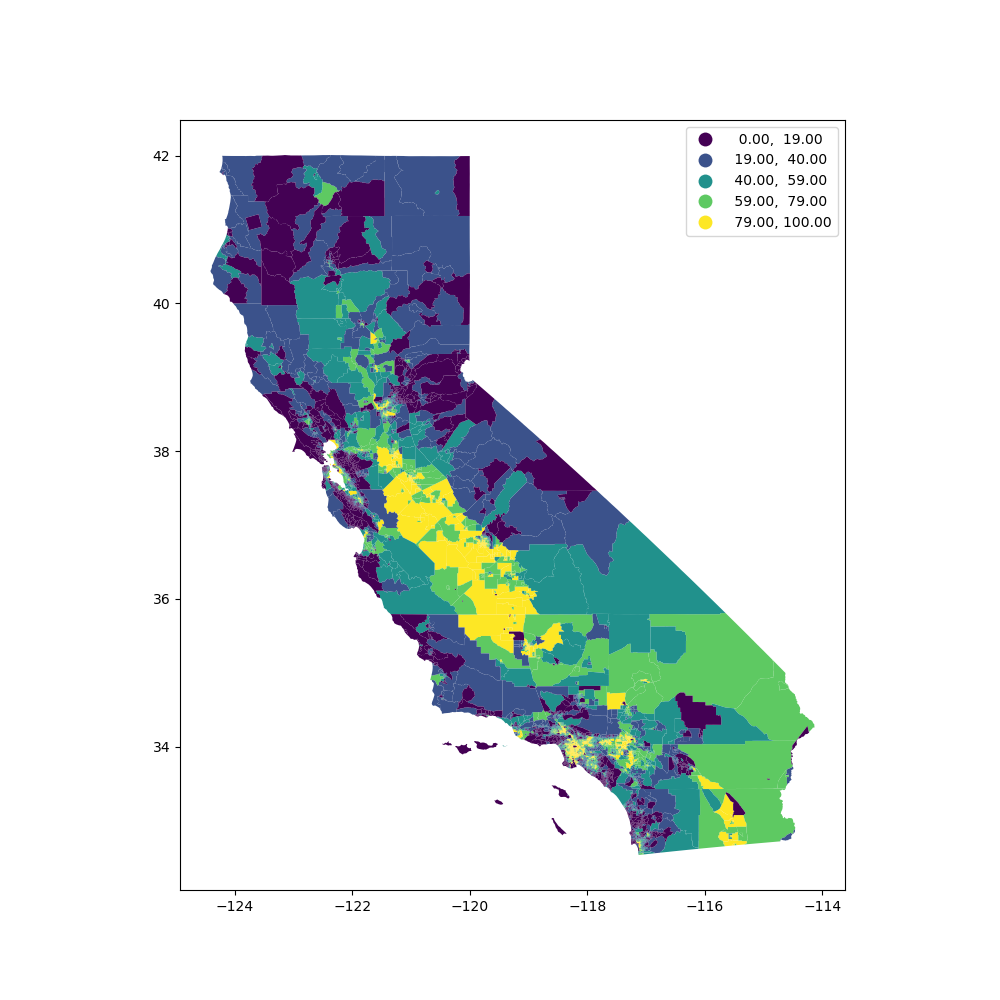

In [47]:
# to map the sorted dataframe using geopandas chloropleth maps
gdf_sortbyces.plot(figsize=(10,10),
                   column='CIscoreP',
                   legend=True,
                   scheme='NaturalBreaks')

Success! Here's a map that shows the state of California by census tracts sorted by CES percentile. I used the natural breaks scheme, which skews the data a bit by grouping tracts with high CES percentiles together.

There seem to be a cluster of high CES percentiles, or high environmental burden, in the central valley. 

# Power Plant Distribution Across CA

Next, we start with plotting power plant distributions across CA. Our first map is of all power plants together. 

<IPython.core.display.Javascript object>


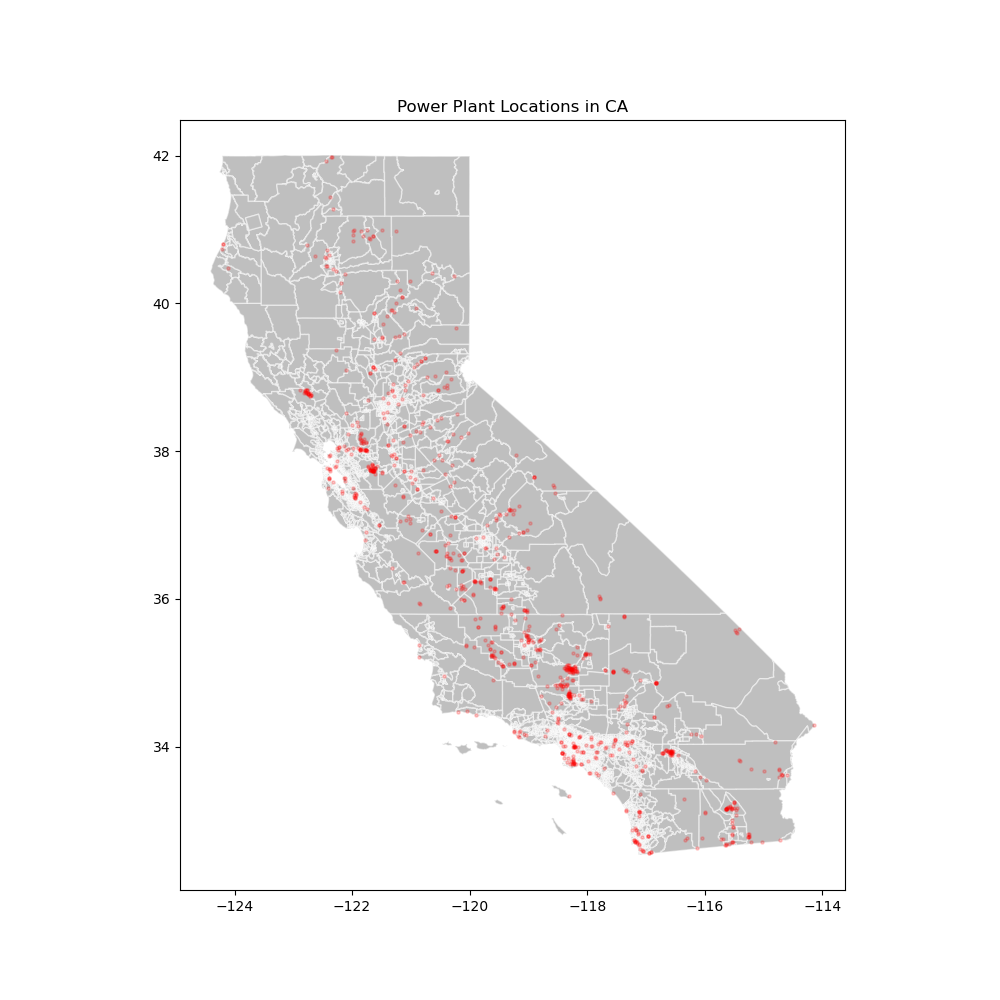

Text(0.5, 1.0, 'Power Plant Locations in CA')

In [55]:
# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# block groups
gdf_sortbyces.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

# cpp_trim
cpp_trim.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=5,
            alpha=0.2)

#add title to graph
ax.set_title('Power Plant Locations in CA')

Let's do the same thing, but for fossil fuels and just clean energy. In order to do that, we'll need to create a new dataframe with just fossil fuel plants and another dataframe for just clean energy plants.

In [37]:
gdf_ff = cpp_trim[cpp_trim.Renewable_Energy=='Fossil Fuel']
gdf_ff

,Name,Fuel_Type,Status,County,State,Renewable_Energy,Jobs,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Income_Percent,Project_Location,geometry,x,y
45,TXI Cement,Coal,Operating,San Bernardino,CA,Fossil Fuel,12.1,70-75%,73,-117.336464,34.603904,59,Low Income,POINT (-117.33646 34.60390),-117.336464,34.603904
46,Wilbur W Power Plant,Coal,Operating,Contra Costa,CA,Fossil Fuel,19.2,70-75%,74,-121.780699,38.011658,108,Disadvantaged Community,POINT (-121.78070 38.01166),-121.780699,38.011658
47,Wilbur E Power Plant,Coal,Operating,Contra Costa,CA,Fossil Fuel,19.2,70-75%,74,-121.755959,38.010743,108,Disadvantaged Community,POINT (-121.75596 38.01074),-121.755959,38.010743
48,Nichols Road,Coal,Operating,Contra Costa,CA,Fossil Fuel,19.2,65-70%,68,-121.987232,38.043511,81,Neither Low Income Nor Disadvantaged Community,POINT (-121.98723 38.04351),-121.987232,38.043511
49,E Third Street,Coal,Operating,Contra Costa,CA,Fossil Fuel,19.2,75-80%,78,-121.870130,38.030767,111,Disadvantaged Community,POINT (-121.87013 38.03077),-121.870130,38.030767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,Harbor 6 - 9,Gas,Operating,Los Angeles,CA,Fossil Fuel,1220.1,95-100% (highest scores),97,-118.265413,33.769336,49,Low Income and Disadvantaged Community,POINT (-118.26541 33.76934),-118.265413,33.769336
357,Redondo Beach,Gas,Operating,Los Angeles,CA,Fossil Fuel,1273.5,45-50%,49,-118.394751,33.849845,140,Neither Low Income Nor Disadvantaged Community,POINT (-118.39475 33.84985),-118.394751,33.849845
358,Ormond Beach,Gas,Operating,Ventura,CA,Fossil Fuel,1516.0,80-85%,83,-119.168817,34.130161,,,POINT (-119.16882 34.13016),-119.168817,34.130161
359,Haynes,Gas,Operating,Los Angeles,CA,Fossil Fuel,1626.5,,,-118.099310,33.764824,,,POINT (-118.09931 33.76482),-118.099310,33.764824


In [38]:
gdf_ce = cpp_trim[cpp_trim.Renewable_Energy=='Clean Energy']
gdf_ce

,Name,Fuel_Type,Status,County,State,Renewable_Energy,Jobs,CES30_PercentileRange,CES30_Percentile,Lon,Lat,Income_Percent,Project_Location,geometry,x,y
0,Burney Mtn. Power,Biomass,Operating,Shasta,CA,Clean Energy,19.8,50-55%,51,-121.639588,40.910001,61,Neither Low Income Nor Disadvantaged Community,POINT (-121.63959 40.91000),-121.639588,40.910001
1,Mt. Lassen Power,Biomass,Operating,Lassen,CA,Clean Energy,20.5,30-35%,30,-121.017831,40.297420,66,Neither Low Income Nor Disadvantaged Community,POINT (-121.01783 40.29742),-121.017831,40.297420
2,Commerce,Biomass,Operating,Los Angeles,CA,Clean Energy,20.7,95-100% (highest scores),97,-118.153791,33.994861,75,Disadvantaged Community,POINT (-118.15379 33.99486),-118.153791,33.994861
3,Collins Pine,Biomass,Operating,Plumas,CA,Clean Energy,21.6,20-25%,24,-121.243968,40.302078,70,Neither Low Income Nor Disadvantaged Community,POINT (-121.24397 40.30208),-121.243968,40.302078
4,Chowchilla II,Biomass,Standby,Madera,CA,Clean Energy,22.5,70-75%,72,-120.248840,37.106925,48,Low Income,POINT (-120.24884 37.10693),-120.248840,37.106925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,North Sky River,Wind,Operating,Kern,CA,Clean Energy,239.8,55-60%,58,-118.180476,35.350289,60,Low Income,POINT (-118.18048 35.35029),-118.180476,35.350289
867,Alta V,Wind,Operating,Kern,CA,Clean Energy,248.6,75-80%,79,-118.237654,35.000797,51,Low Income and Disadvantaged Community,POINT (-118.23765 35.00080),-118.237654,35.000797
868,Pinyon Pines I,Wind,Operating,Kern,CA,Clean Energy,248.6,75-80%,79,-118.214379,35.039737,51,Low Income and Disadvantaged Community,POINT (-118.21438 35.03974),-118.214379,35.039737
869,Manzana,Wind,Operating,Kern,CA,Clean Energy,279.7,70-75%,71,-118.467845,34.944331,96,Neither Low Income Nor Disadvantaged Community,POINT (-118.46784 34.94433),-118.467845,34.944331


Above, we created two separate dataframes to house our clean energy plant data and our fossil fuel plant data. Let's map them! 

First, let's map the fossil fuel plants.

<IPython.core.display.Javascript object>


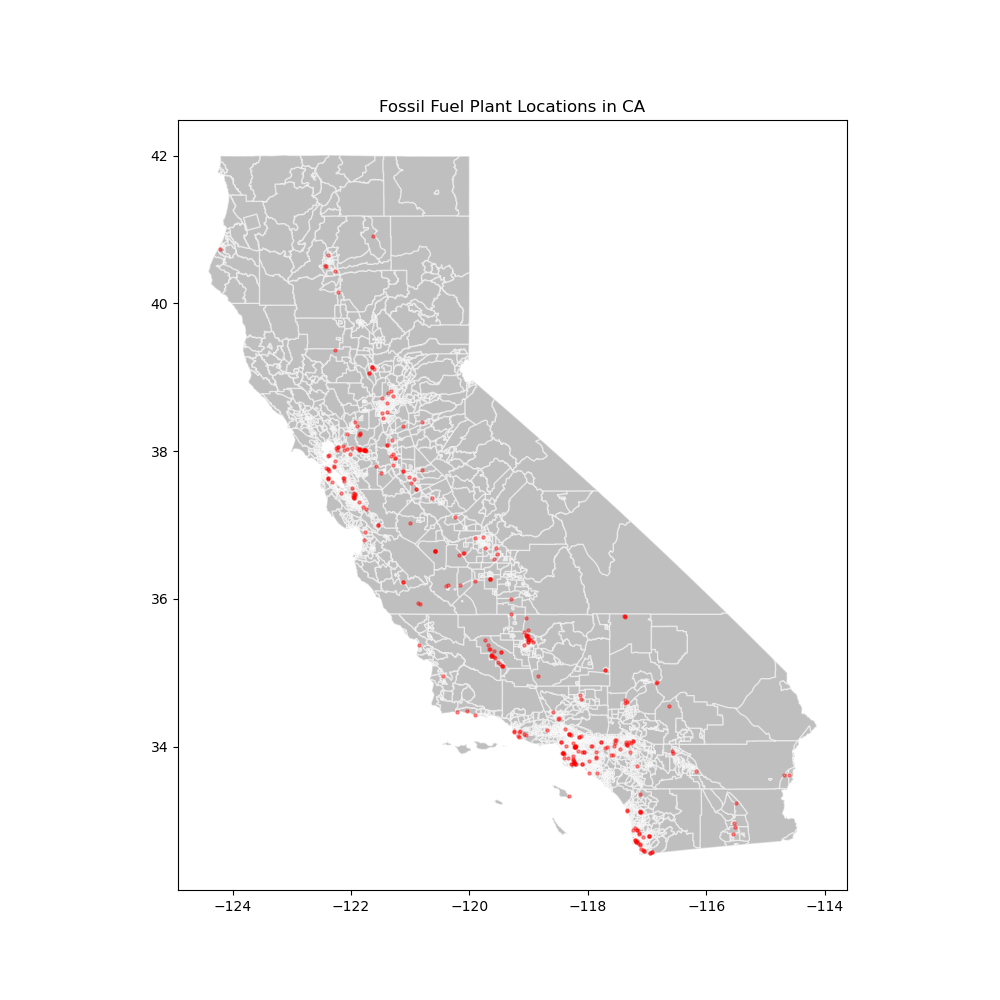

Text(0.5, 1.0, 'Fossil Fuel Plant Locations in CA')

In [54]:


# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# block groups
gdf_sortbyces.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

# cpp_trim
gdf_ff.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=5,
            alpha=0.4)

#add title to graph
ax.set_title('Fossil Fuel Plant Locations in CA')

Next, let's map out the clean energy plants. 

<IPython.core.display.Javascript object>


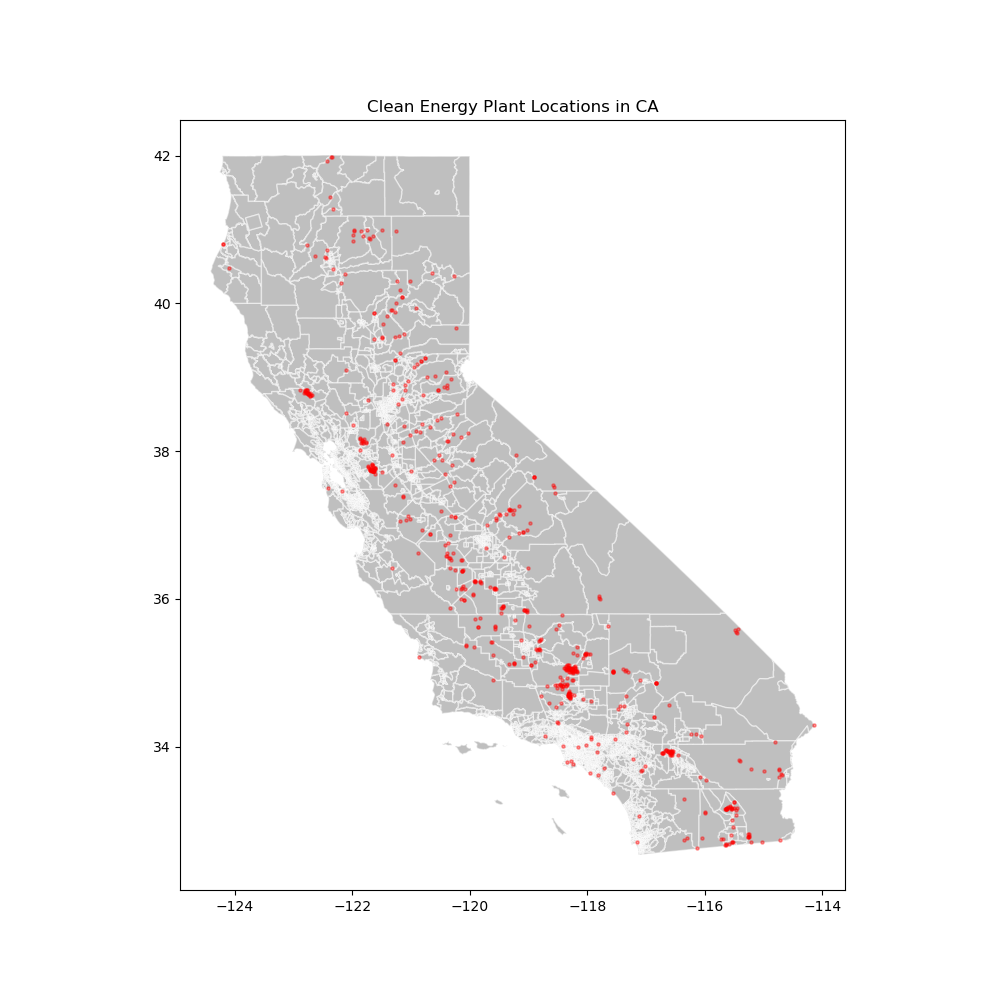

Text(0.5, 1.0, 'Clean Energy Plant Locations in CA')

In [53]:

# set up the plot canvas with plt.subplots
fig, ax = plt.subplots(figsize=(10, 10))

# block groups
gdf_sortbyces.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

# cpp_trim
gdf_ce.plot(ax=ax, # this also puts it in the same ax plot
            color='red',
            markersize=5,
            alpha=0.4)

#add title to graph
ax.set_title('Clean Energy Plant Locations in CA')

We produced three maps of the spatial distribution of total powerplants, clean energy powerplants, and fossil fuel power plants. We did this to start to visualize where the clusters are located. 

# Hex binning: Power Plant Density

Next, let's dig deeper into the power plant densities. We want to see not just where power plants are, but where they are concentrated. We want to do this for all power plants, clean energy plants, and fossil fuel plants. 

In [29]:
# seaborn needs an x and y column so let's extract it from the geometry field
cpp_trim['x'] = cpp_trim.geometry.x
cpp_trim['y'] = cpp_trim.geometry.y

<IPython.core.display.Javascript object>


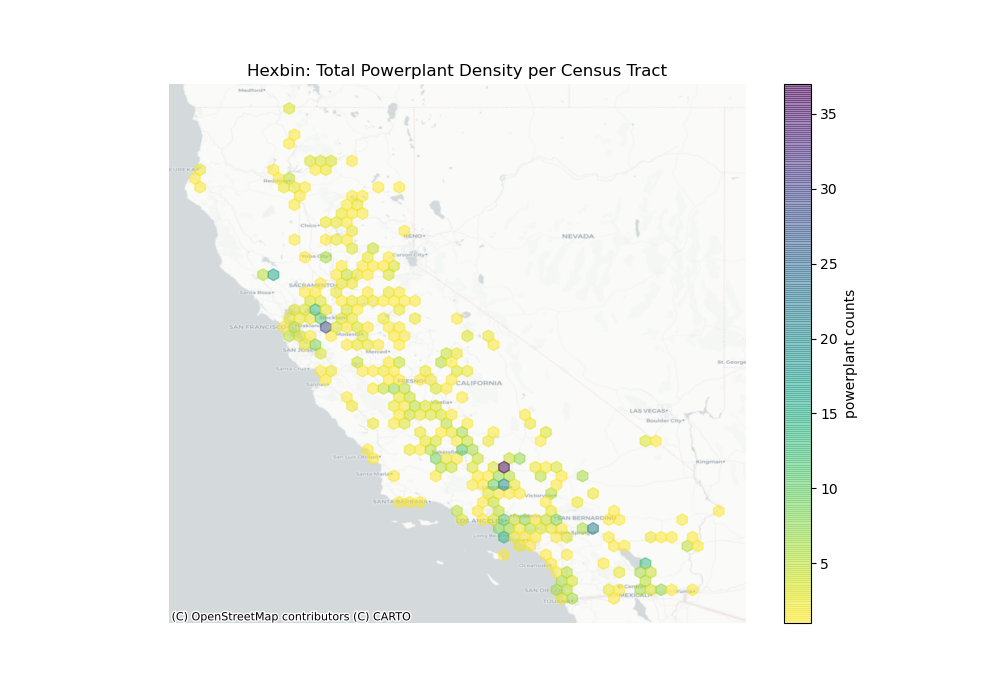

(-124.71201856107515, -113.63686323892485, 32.091650538500005, 42.4497387515)

In [41]:
# Set up figure and axis
f, ax = plt.subplots(figsize=(10,7))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no crime,
# and the reverse viridis colormap
hb = ax.hexbin(
    x = cpp_trim['x'], 
    y = cpp_trim['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis_r')

# title
#new_title = 'Powerplant Counts per Census Tract'
#ax.legend([new_title])

# Add basemap
ctx.add_basemap(
    ax, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

#add colorbar and add label
cb = plt.colorbar(hb, ax=ax)
cb.set_label('powerplant counts')

#add title to graph
ax.set_title("Hexbin: Total Powerplant Density per Census Tract")

# Remove axes
ax.axis('off')

Great, we created and printed the two data frames for just clean energy and just fossil fuel plants. 

Now, let's create a hexbin plot to map count density for each. We start with a clean energy map. 

/opt/conda/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


<IPython.core.display.Javascript object>


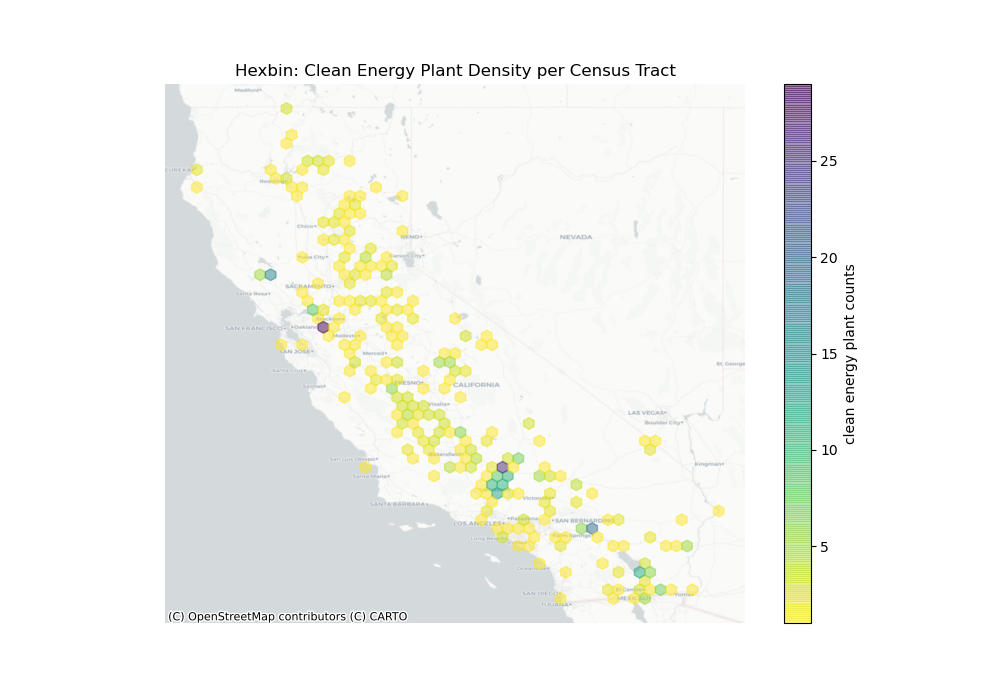

(-124.70618591606903,
 -113.63714098393096,
 32.15556258949999,
 42.446695320500005)

In [42]:
#clean energy hexbins

# seaborn needs an x and y column so let's extract it from the geometry field
gdf_ce['x'] = gdf_ce.geometry.x
gdf_ce['y'] = gdf_ce.geometry.y

# Set up figure and axis
f, ax = plt.subplots(figsize=(10,7))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no clean energy plants,
# and the reverse viridis colormap
hb = ax.hexbin(
    x = gdf_ce['x'], 
    y = gdf_ce['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis_r')

# title
#new_title = 'Powerplant Counts per Census Tract'
#ax.legend([new_title])

# Add basemap
ctx.add_basemap(
    ax, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

#add colorbar and add label
cb = plt.colorbar(hb, ax=ax)
cb.set_label('clean energy plant counts')

#add title to graph
ax.set_title("Hexbin: Clean Energy Plant Density per Census Tract")


# Remove axes
ax.axis('off')


Finally, we end with a fossil fuel map. 

<IPython.core.display.Javascript object>


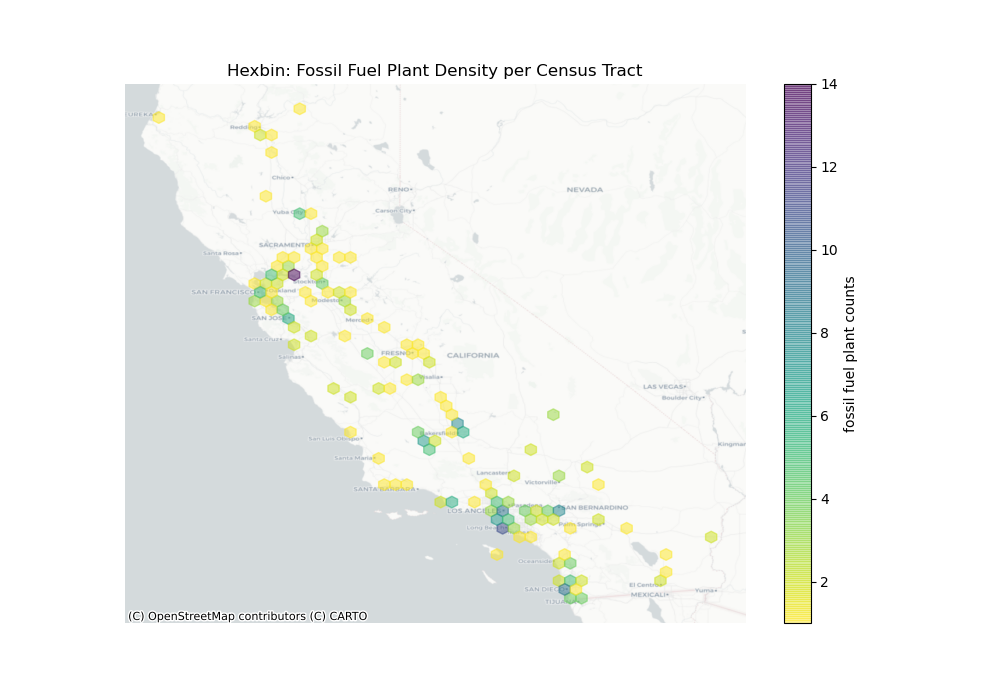

(-124.68910928057115, -114.11795811942886, 32.145245823500005, 41.3242377665)

In [43]:
# add x and y columns to the gdf_ff datagrame. 

gdf_ff['x'] = gdf_ff.geometry.x
gdf_ff['y'] = gdf_ff.geometry.y

# Set up figure and axis
f, ax = plt.subplots(figsize=(10,7))

# Generate and add hexbin with 50 hexagons in each 
# dimension, half transparency, ommitting grids with no crime,
# and the reverse viridis colormap
hb = ax.hexbin(
    x = gdf_ff['x'], 
    y = gdf_ff['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, # don't show zero
    cmap='viridis_r')

# title


# Add basemap
ctx.add_basemap(
    ax, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

#add colorbar and add label
cb = plt.colorbar(hb, ax=ax)
cb.set_label('fossil fuel plant counts')

#add title to graph
ax.set_title("Hexbin: Fossil Fuel Plant Density per Census Tract")


# Remove axes
ax.axis('off')

Above, we gain a little bit more insight into where power plants are concentrated. We created three maps that show where fossil fuel vs. clean energy power plant types are concentrated, as well as where power plants are concentrated when we look at it as a whole. 

# Interactive Drop Down Map 

Now, we want to create a map with drop down options, allowing us to filter by Project Location and Renewable Energy type. In order to do so, we import a libary that grants interactive powers. We create an interactive function that maps power plants over CES scores, allowing the user to filter by Renewable Energy and Project location fields. 

In [44]:
#create a list for unique project locations, so we can run it through our interactive function

unique_project_locations = cpp_trim['Project_Location'].unique()

In [45]:

#import library
from ipywidgets import interact, interact_manual


#create interactive function
@interact
def test(Renewable=['Clean Energy', 'Fossil Fuel'], Location = unique_project_locations):

   # set up the plot canvas with plt.subplots
    fig, ax = plt.subplots(figsize=(10, 10)) 
    
    
    #plot the base map of the CIscoreP. 
    gdf_sortbyces.plot(ax=ax, # this puts it in the ax plot
            column = 'CIscoreP', 
            edgecolor='grey',
            linewidth = 0.4,
            cmap = 'plasma',
            legend=True,
            #In order to create a legend title, we need to create parameters to pass to the legend function internally. 
            legend_kwds=dict(title="CES Percentiles"),
            scheme='quantiles',
            alpha=0.7)

    # create a new geodataframe variable called display_data, set equal to renewable energy field. 
    display_data = cpp_trim[cpp_trim.Renewable_Energy==Renewable]
    
    # further filter the new variable above by Project Location field. 
    display_data = display_data[display_data.Project_Location==Location]
    
    #plot
    display_data.plot(ax=ax, # this also puts it in the same ax plot
            cmap = 'Reds_r',
            column='Renewable_Energy',
            markersize=50,
            alpha=0.9)
    #title
    plt.title('Power Plants by CES Percentiles\n Filtered by Energy Type and Plant Location')

    
    plt.show()
    

interactive(children=(Dropdown(description='Renewable', options=('Clean Energy', 'Fossil Fuel'), value='Clean …

We create a map of powerplant locations over CES scores with the ability to zoom via matplotlib and the ability to filter based on Renewable_Energy field and Project_Location fields. In class, we learned how to filter based on a single variable, but it was cool to add in filtering based on an additional variable.

I wanted to add a second legend to identify the markers as fossil fuel or clean energy to this map, but if matplotlib gives us this functionality, it eluded me. After a few hours of troubleshooting, I gave up on the second legend. The plot title and drop down list should suffice to help the audience know whether the points are clean energy or fossil fuel.